In [137]:

%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2021-04-07 16:16:13--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [138]:
site_packages_path = '/content/AMPL/lib/python3.7/site-packages'
if site_packages_path not in sys.path:
  sys.path.insert(1, site_packages_path)
sys.path

['/tensorflow-1.15.2/python3.7',
 '/content/AMPL/lib/python3.7/site-packages',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages/',
 '/usr/local/lib/python3.7/site-packages/']

In [139]:
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [140]:
!pip install bravado

In [141]:
!pip install molvs

In [142]:
!pip install umap

In [143]:
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np
import pandas as pd
import os
import requests
import sys

import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp

In [144]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# manipulate data
import pandas as pd

import json
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [10,10]

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))

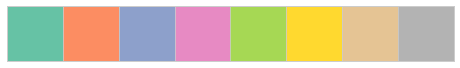

In [145]:
sns.palplot(pal)

In [146]:
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

In [147]:
from google.colab import files

In [148]:
uploaded = files.upload()

Saving ChEMBL.csv to ChEMBL (2).csv


In [149]:
chembl = pd.read_csv(io.StringIO(uploaded['ChEMBL.csv'].decode('ISO-8859-1')))

In [212]:
uploaded = files.upload()

Saving DTC.csv to DTC (4).csv


In [214]:
dtc = pd.read_csv(io.StringIO(uploaded['DTC.csv'].decode('utf-8')))

In [154]:
uploaded = files.upload()

Saving EXCAPE.csv to EXCAPE (2).csv


In [155]:
excape = pd.read_csv(io.StringIO(uploaded['EXCAPE.csv'].decode('utf-8')))

In [215]:
# get rid of spaces
chembl.columns = chembl.columns.str.replace(' ','_') 
dtc.columns = dtc.columns.str.replace(' ','_') 
excape.columns = excape.columns.str.replace(' ','_') 

## Chembl - Curation step

In [179]:
chembl.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM
0,CHEMBL4539943,NaN,0.0,505.57,1.0,3.60,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,Inhibition,'=',6.2900,%,NaN,NaN,Not Active,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4507829,GPCRScan assay: inhibition of Alpha1B,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,Parental cells: stable HEK | PMID: 7780636/168...,NaN,NaN,CHEMBL232,Alpha-1b adrenergic receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4507264,54.0,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,NaN,Compound concentration None 10.0 uM,6.2900
1,CHEMBL4163587,NaN,0.0,459.51,0.0,2.75,10,COc1cc2nc(N3CCC[C@H](NC4=CC(=O)c5ccccc5C4=O)C3...,Ki,'=',0.5248,nM,9.28,NaN,NaN,UO_0000065,20.20,0.37,6.53,7.75,False,CHEMBL4139219,Displacement of [3H]prazosin from human alpha1...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,CHO,NaN,NaN,NaN,NaN,CHEMBL232,Alpha-1b adrenergic receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4138091,1.0,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,0.5248
2,CHEMBL234679,NaN,0.0,482.65,0.0,3.76,6cis,CC(C)Oc1ccccc1N1CCN([C@H]2CC[C@@H](NS(=O)(=O)c...,Ki,'=',217.0000,nM,6.66,NaN,NaN,UO_0000065,13.81,0.27,2.90,7.78,False,CHEMBL894517,Binding affinity to human cloned adrenergic al...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL232,Alpha-1b adrenergic receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1148021,1.0,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,NaN,NaN,217.0000
3,CHEMBL15245,YOHIMBINE,4.0,354.45,0.0,2.65,Yohimbine,COC(=O)[C@H]1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5c...,Ki,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL4380086,Displacement of [3H]prazosin from human recomb...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,CHO,NaN,NaN,NaN,NaN,CHEMBL232,Alpha-1b adrenergic receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4376854,1.0,Scientific Literature,J Med Chem,2020.0,CHEMBL3308072,NaN,NaN
4,CHEMBL293980,NaN,0.0,424.37,0.0,3.82,70,O=C1CC2(CCCC2)CC(=O)N1CCN1CCN(c2ccc(Cl)cc2Cl)CC1,Ki,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL649208,Binding affinity constant against alpha-1B adr...,B,BAO_0000221,tissue-based format,Cavia porcellus,CHEMBL3559722,Spleen,NaN,NaN,NaN,NaN,NaN,CHEMBL232,Alpha-1b adrenergic receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1149137,1.0,Scientific Literature,J. Med. Chem.,2004.0,NaN,NaN,NaN


In [180]:
chembl['Standard_Value_nM'] = np.where(chembl.Standard_Units=='uM',chembl.Standard_Value*1000,chembl.Standard_Value)

In [181]:
chembl = chembl.replace('None',np.nan)

In [182]:
#even after removing None you have to recast the column as numeric
numeric_cols=['Molecule_Max_Phase',
       'Molecular_Weight', '#RO5_Violations', 'AlogP', 'Standard_Value_nM',
       'pChEMBL_Value', 'Ligand_Efficiency_BEI', 'Ligand_Efficiency_LE',
       'Ligand_Efficiency_LLE', 'Ligand_Efficiency_SEI']
for col in numeric_cols:
  chembl[col]=chembl[col].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2248cc8210>,
      dtype=object)

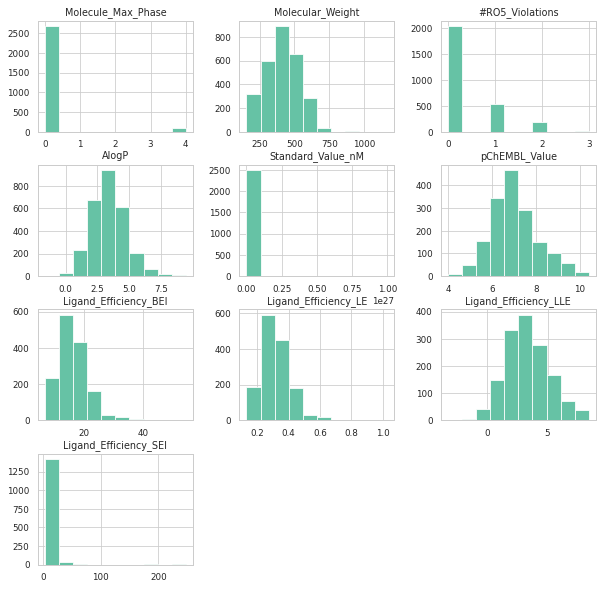

In [183]:
chembl[numeric_cols].hist(figsize=(10,10))

*   Note that pChembl value is better normalized than standard value
*   Recall that there are lots of different activity types/assays represented in the value columns. Let's split those up.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224848bb50>,
      dtype=object)

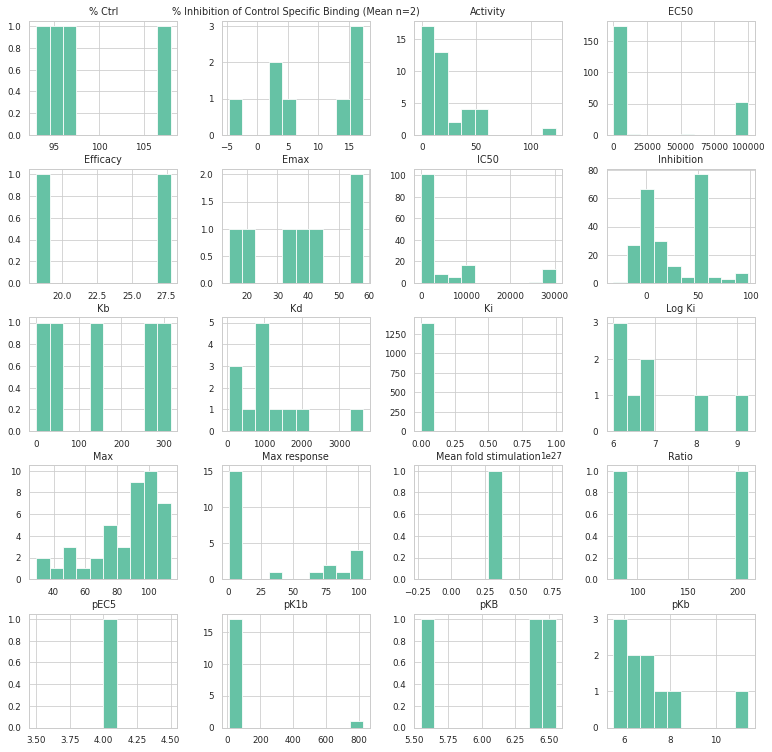

In [184]:
chembl_types = chembl.pivot_table(index='Molecule_ChEMBL_ID',columns='Standard_Type',values='Standard_Value_nM',aggfunc='mean')
chembl_types.hist(figsize=(13,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2247cb2d90>,
      dtype=object)

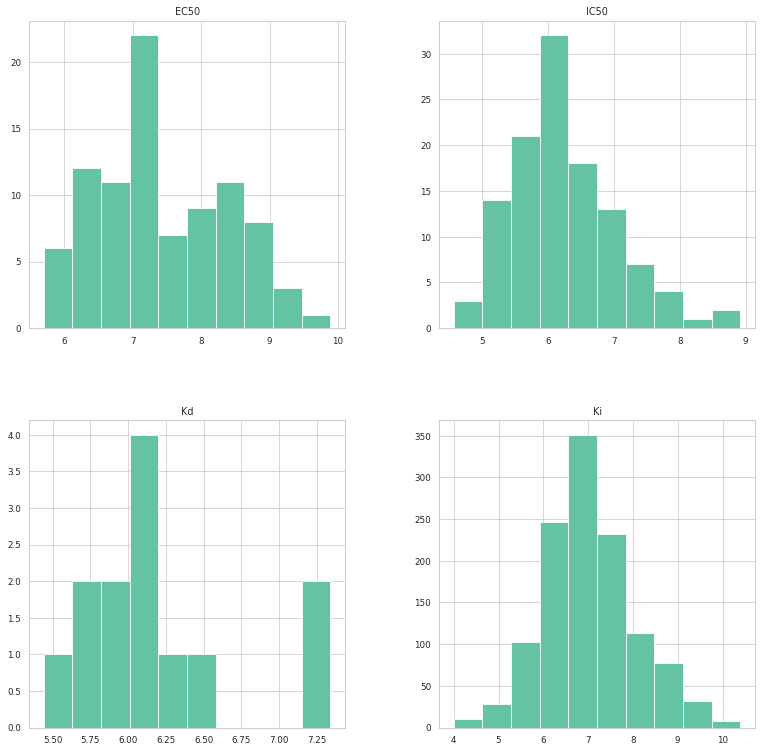

In [185]:
chembl_types = chembl.pivot_table(index='Molecule_ChEMBL_ID',columns='Standard_Type',values='pChEMBL_Value',aggfunc='mean')
chembl_types.hist(figsize=(13,13))

## DTC EDA

In [216]:
dtc = dtc.replace('None',np.nan)

In [217]:
dtc['pDTC_Value'] = np.where(dtc.End_Point_Standard_Units=='NM',-np.log10(dtc.End_Point_Standard_Value/1000000000),dtc.End_Point_Standard_Value)

In [218]:
dtc.describe()

,Max_Phase,Wild_type_or_mutant,Mutation_information,PubMed_ID,End_Point_Standard_Value,Endpoint_Mode_of_Action,Inhibitor_Type,Compound_concentration_value,Compound_concentration_value_units,Substrate_type,Substrate_Type_Standard_Relation,Substrate_Type_Standard_Value,Substrate_Type_Standard_Units,Year,Volume,Issue,Annotation_Comments,Assay_ID,DTC_Activity_ID,Record_ID,DTC_Document_ID,pDTC_Value
count,2442.000000,0.0,0.0,2.392000e+03,2.256000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2311.000000,2311.000000,2253.000000,0.0,2.311000e+03,2.442000e+03,2.442000e+03,2442.000000,2256.000000
mean,0.178952,NaN,NaN,1.576288e+07,4.432624e+23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.936824,31.982691,13.723036,NaN,3.805226e+05,3.840944e+06,1.135576e+06,27229.162981,10.536643
std,0.815860,NaN,NaN,5.504291e+06,2.105380e+25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.567639,18.083708,7.049784,NaN,4.485567e+05,4.667776e+06,6.214493e+05,20532.910821,23.154210
min,0.000000,NaN,NaN,-1.000000e+00,-1.710000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,3.000000,1.000000,NaN,3.008400e+04,9.684000e+03,2.195000e+03,933.000000,-18.000000
25%,0.000000,NaN,NaN,1.135436e+07,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,16.000000,8.000000,NaN,3.434700e+04,9.643105e+05,6.146922e+05,14595.000000,5.777500
50%,0.000000,NaN,NaN,1.367841e+07,1.505000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,38.000000,14.000000,NaN,3.462400e+04,1.531934e+06,1.166172e+06,18073.000000,6.773169
75%,0.000000,NaN,NaN,2.060528e+07,1.200000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,46.000000,20.000000,NaN,6.582380e+05,3.530904e+06,1.662460e+06,44212.000000,7.762287
max,4.000000,NaN,NaN,2.783992e+07,1.000000e+27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,104.000000,26.000000,NaN,1.579181e+06,1.507904e+07,2.114304e+06,70168.000000,826.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2246aa5e50>,
      dtype=object)

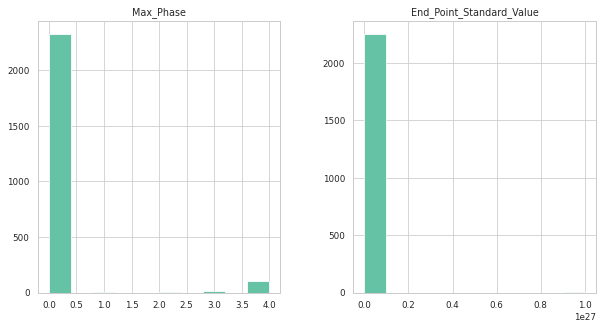

In [219]:
numeric_cols=['Max_Phase', 'End_Point_Standard_Value']
dtc[numeric_cols].hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224d2b37d0>,
      dtype=object)

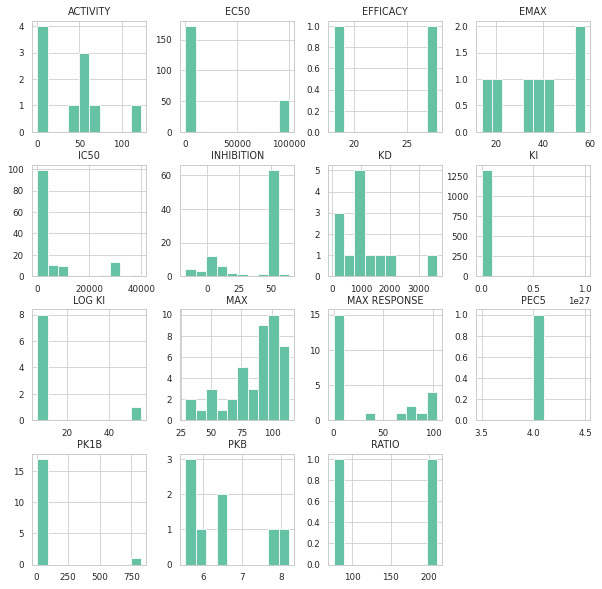

In [220]:
dtc_types=dtc.pivot_table(index = 'Compound_ID', columns = 'End_Point_Standard_Type', values='End_Point_Standard_Value', aggfunc='mean')
dtc_types.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224629ead0>,
      dtype=object)

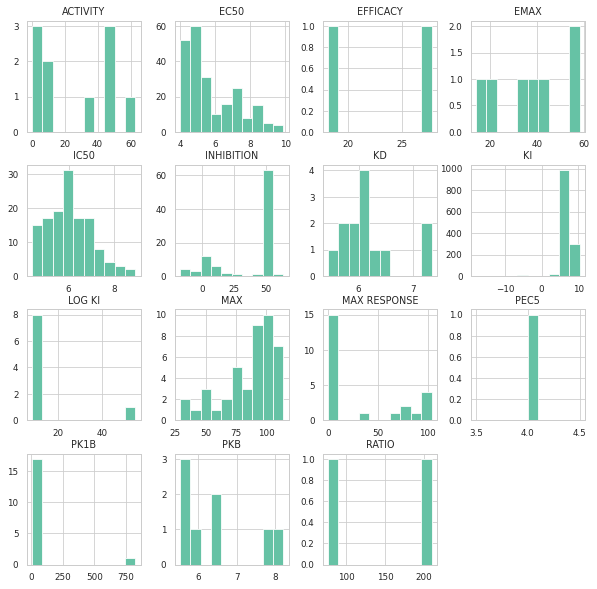

In [221]:
dtc_types=dtc.pivot_table(index = 'Compound_ID', columns = 'End_Point_Standard_Type', values='pDTC_Value', aggfunc='mean')
dtc_types.hist(figsize=(10,10))

## Excape EDA

In [192]:
excape=excape.replace('None',np.nan)

,Entrez_ID,pXC50,Original_Assay_ID,Tax_ID,Ortholog_Group
count,1254.000000,1245.000000,1.254000e+03,1254.000000,1254.0
mean,4534.523126,6.974847,3.524904e+05,9699.133971,93.0
std,9286.174553,1.056244,3.497069e+05,197.117665,0.0
min,147.000000,3.870000,3.227400e+04,9606.000000,93.0
25%,147.000000,6.240000,3.434400e+04,9606.000000,93.0
50%,147.000000,6.900000,2.908670e+05,9606.000000,93.0
75%,147.000000,7.620000,6.634680e+05,9606.000000,93.0
max,24173.000000,10.100000,1.368306e+06,10116.000000,93.0


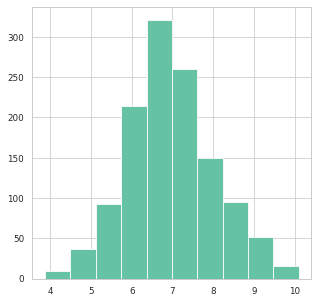

In [193]:
display(excape.describe())
excape.pXC50.hist(figsize=(5,5))

## Compare pResponse values across ChEMBL, DTC and Excape-DB

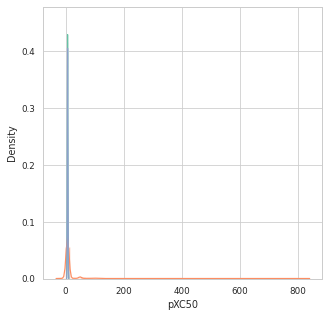

In [194]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.distplot(chembl.pChEMBL_Value, ax=ax)
sns.distplot(dtc.pDTC_Value, ax=ax)
sns.distplot(excape.pXC50, ax=ax);

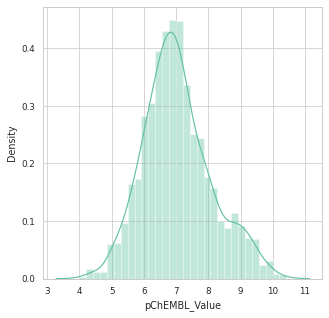

In [195]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.distplot(chembl.pChEMBL_Value, ax=ax)


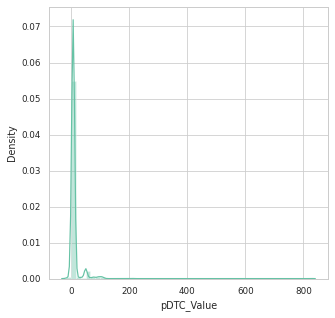

In [196]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.distplot(dtc.pDTC_Value, ax=ax)

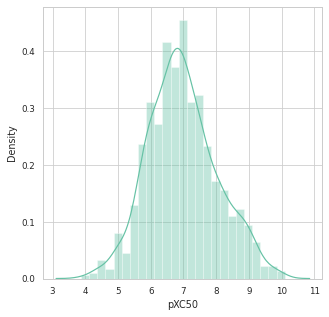

In [197]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.distplot(excape.pXC50, ax=ax)

# Analysis

I would model either pXC50 or pKI values. They are the most abundant in the dataset and commonly used for modeling. pKI is more normally distributed, but pXC50 values allow inclusion of excape data.

According to some sources, these two datapoints can be combined in various ways, as well, but that's beyond the scope of this class.

I would choose a reasonable IC50 concentration to use as a threshold (perhaps 10uM, or consult with a scientist), and anything with an IC50 above that threshold is inactive (you need more drug to get activity) and IC50s below this threshold is active (you need less drug for activity, meaning the compound is MORE active per unit)



## Get SMILES for DTC data

In [254]:
uploaded = files.upload()

Saving DTC_smiles.txt to DTC_smiles.txt


In [256]:
dtc_smiles = pd.read_csv(io.StringIO(uploaded['DTC_smiles.txt'].decode('utf-8')),sep='\t',header=None)

In [257]:
dtc_smiles = dtc_smiles.rename(columns={0:'ChEMBL_ID',1:'SMILES'})

In [258]:
dtc['SMILES'] = dtc['Compound_ID'].map(dict(zip(dtc_smiles.ChEMBL_ID, dtc_smiles.SMILES)))

In [259]:
print(dtc['SMILES'].isna().sum())
print(chembl['Smiles'].isna().sum())
print(excape['SMILES'].isna().sum())

21
0
0


## EDA: Examine compound overlaps¶

In [203]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2

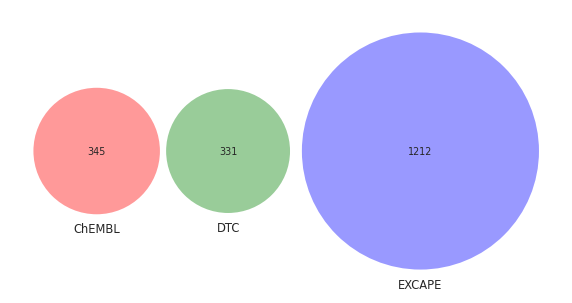

In [260]:
venn3([set(chembl.Smiles),set(dtc.SMILES),set(excape.SMILES)],set_labels=['ChEMBL','DTC','EXCAPE'])

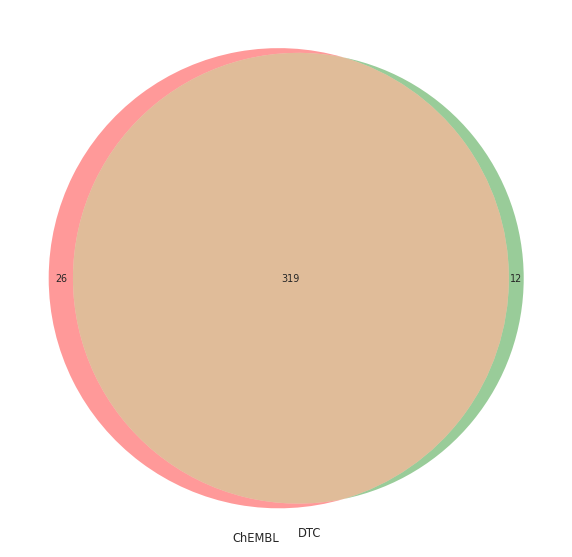

In [261]:
venn2([set(chembl.Molecule_ChEMBL_ID),set(dtc.Compound_ID)],set_labels=['ChEMBL','DTC'])


The chembl IDs overlap, why not the smiles strings? One explanation is that each database's SMILES string representations are slightly different. Answer? STANDARDIZE the smiles strings.

In [206]:
chembl['base_rdkit_smiles'] = chembl.Smiles.apply(curate_data.base_smiles_from_smiles)
print(len(chembl.Smiles))
print(len(chembl.Smiles.unique()))
print(len(chembl.base_rdkit_smiles.unique()))

2791
2140
2129


In [207]:
chembl=chembl[~chembl.base_rdkit_smiles.isna()]

In [ ]:
dtc

In [264]:
dtc['base_rdkit_smiles'] = dtc.SMILES.apply(curate_data.base_smiles_from_smiles)
dtc=dtc.replace('',np.nan)
dtc = dtc[~dtc.base_rdkit_smiles.isna()]

In [ ]:
dtc

In [266]:
len(dtc[dtc.base_rdkit_smiles.isna()])

0

In [234]:
excape['base_rdkit_smiles'] = excape.SMILES.apply(curate_data.base_smiles_from_smiles)

In [235]:
excape = excape.replace('',np.nan)
excape[excape.base_rdkit_smiles.isna()]

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,base_rdkit_smiles


## EDA Curation data

* First let us curate the data
* Examine new compound overlaps
* Examine final response column distributions
* Filter for
 *      large compounds
 * too high / too low pXC50 values
* double check for no NA values left
* save final curated dataset for further processing




In [267]:
chembl.to_csv("/content/ChEMBL_SMILES_std.csv")
dtc.to_csv("/content/DTC_SMILES_std.csv")
excape.to_csv("/content/Excape_SMILES_std.csv")

In [238]:
chembl['pChEMBL_Value_nM'] = -np.log10(chembl.Standard_Value_nM/1000000000)

In [239]:
vals = ['EC50', 'IC50', 'pIC50']
chembl=chembl[chembl.Standard_Type.isin(vals)]
chembl=chembl.dropna(axis=0, subset = ['pChEMBL_Value_nM','base_rdkit_smiles'])

In [240]:
chembl['pRelation'] = chembl.Standard_Relation
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'<'", ">", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'>'", "<", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'='", "=", chembl.pRelation)
chembl[['Standard_Relation', 'pRelation']].head()

,Standard_Relation,pRelation
16,'<',>
33,'=',=
37,'>',<
39,'<',>
40,'<',>


In [241]:
thresh=-np.log10(100/1000000000) # pIC50 of 100nM for threshold

In [242]:
chembl_cur = curate_data.aggregate_assay_data(chembl, value_col = 'pChEMBL_Value_nM', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Molecule_ChEMBL_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)

0 entries in input table are missing SMILES strings
343 unique SMILES strings are reduced to 343 unique base SMILES strings


In [243]:
chembl_cur.to_csv("/content/ChEMBL_cur.csv")

In [268]:
# DTC
# select pIC50 values
vals = ['EC50', 'IC50', 'PIC50']
print(dtc.shape)
dtc=dtc[dtc.End_Point_Standard_Type.isin(vals)]
print(dtc.shape)

# flip arrows for relation column to reflect pValues not normal values
dtc['pRelation'] = dtc.End_Point_Standard_Relation
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "<", ">", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == ">", "<", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "=", "=", dtc.pRelation)
print(dtc.pRelation.unique())
display(dtc[['End_Point_Standard_Relation', 'pRelation']].head())

dtc=dtc.dropna(axis=0, subset = ['pDTC_Value','base_rdkit_smiles'])
print(dtc.shape)

# aggregate duplicates
dtc_cur = curate_data.aggregate_assay_data(dtc, value_col = 'pDTC_Value', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Compound_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)

dtc_cur.to_csv("/content/DTC_cur.csv")

(393, 47)
(393, 47)
['=' '>' '<']


,End_Point_Standard_Relation,pRelation
2,=,=
4,<,>
25,=,=
51,<,>
54,<,>


(393, 47)
0 entries in input table are missing SMILES strings
328 unique SMILES strings are reduced to 328 unique base SMILES strings


In [245]:
excape['pRelation']=''
excape=excape.dropna(axis=0, subset = ['pXC50','base_rdkit_smiles'])
excape_cur = curate_data.aggregate_assay_data(excape, value_col = 'pXC50', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Original_Entry_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
excape_cur.to_csv("/content/Excape_cur.csv")

0 entries in input table are missing SMILES strings
1193 unique SMILES strings are reduced to 1193 unique base SMILES strings


In [269]:
chembl_cur['datasource'] = 'chembl'
dtc_cur['datasource']='dtc'
excape_cur['datasource']='excape'
Data = pd.concat([chembl_cur, dtc_cur, excape_cur])
Data.to_csv("/content/merge.csv")

In [275]:
import importlib
importlib.reload(curate_data)
Data_cur = curate_data.aggregate_assay_data(Data, value_col = 'pXC50', 
                                              id_col = 'compound_id', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'relation',
                                              active_thresh=thresh)

print(Data_cur.shape)
print(Data.relation.unique())
Data_cur.head()
Data_cur.to_csv("/content/merge_cur.csv")

0 entries in input table are missing SMILES strings
1526 unique SMILES strings are reduced to 1526 unique base SMILES strings
(1526, 5)
['>' '' '<']
